## **IMPORT LIBRARY/PACKAGES**

Import requisite libraries/packages that will be used.

In [1]:
import os
import csv
import json
import shutil
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

## **DATA PREPARATION**

Download the latest version of Amazon Books Reviews dataset from Kaggle via Kagglehub. Once downloaded, dataset will be located within the specific file path.

In [2]:
path = kagglehub.dataset_download("mohamedbakhet/amazon-books-reviews")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-books-reviews


Replace and adjust previously acquired dataset within a specific location.

In [4]:
target_path = '/content/amazon-books-reviews-dataset'

if not os.path.exists(target_path):
    shutil.move(path, target_path)

This dataset folder consist of two CSV files, namely ```Books_rating.csv``` and ```books_data.csv```. For this purpose, we will utilize ```Books_rating.csv``` and assign pandas CSV reading function to the ```books``` variable to facilitate examination of CSV's metadata, such as its columns headers and row count.  

In [5]:
books = pd.read_csv('/content/amazon-books-reviews-dataset/Books_rating.csv')
books

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


Due to an overwhelming amount of rows —approximately 3,000,000— and limited resource to manage the data. We extracted 25,000 random sample entries to simplify the dataset numbers.

In [6]:
books = books.sample(n=25000, random_state=42)
books = books.reset_index(drop=True)
books

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",NaN,A303XPDO694V6X,Ariel,2/6,4.0,1122163200,Jastrow,Jastrow made a great workthis dictionary can h...
1,0897166159,Espresso Coffee: Professional Techniques,NaN,A3780H4TM9RMB8,David barnes,0/1,2.0,1356912000,NOT the book,Extremely disappointed by the SHORT length and...
2,0736693408,The First King of Shannara (The Sword of Shann...,NaN,A1AX6VPDQQZDPV,M Carlton,4/4,5.0,1105574400,Great (what do you expect?),"This, like all of Brook's Shannara series book..."
3,0395051029,Wuthering Heights (Riverside editions),NaN,A35RQKCCCQ62O0,LadyJ,0/0,4.0,1353888000,Satisfied,I enjoyed this classic. I didn't know the stor...
4,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",NaN,A2IJQDE1I4SIJT,"David C. Arnold ""master D""",1/2,5.0,1167955200,"Ordered 09/02/2006, still on backorder",I would love to read this book. Have accepted ...
...,...,...,...,...,...,...,...,...,...,...
24995,B0007DRHKQ,"The Password to Larkspur Lane (Nancy Drew, Boo...",NaN,A3CPTGFTZZ6779,plum goods,0/0,5.0,1253577600,Pre-Revisons to the text AND with nice early 6...,Every girl loves Nancy Drew. This series of bo...
24996,0671535404,Practical Magic,NaN,NaN,NaN,1/9,5.0,1061942400,Orange,I never have looked at the color orange the sa...
24997,B0007383LS,National Audubon Society field guide to North ...,NaN,A1NHOO6HXE7QSW,Michael Davis,1/1,5.0,1187568000,Great field guide!,Though it took a bit longer than expected to a...
24998,B000N6R4AA,NEW EARTH,NaN,A2RYHCLBBUL6SO,"Priscilla Brady ""Pris""",0/1,5.0,1206489600,Personal Enlightment,I found this book so inspiring and I felt so m...


Select the desired columns and assign them into ```cf_books``` variable.

In [7]:
cf_books = books[['Id', 'Title', 'User_id', 'review/score']].dropna()
cf_books

,Id,Title,User_id,review/score
0,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",A303XPDO694V6X,4.0
1,0897166159,Espresso Coffee: Professional Techniques,A3780H4TM9RMB8,2.0
2,0736693408,The First King of Shannara (The Sword of Shann...,A1AX6VPDQQZDPV,5.0
3,0395051029,Wuthering Heights (Riverside editions),A35RQKCCCQ62O0,4.0
4,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",A2IJQDE1I4SIJT,5.0
...,...,...,...,...
24994,B000MOPS8I,The Devil's Advocate,A3SOV9HFM5H9T1,5.0
24995,B0007DRHKQ,"The Password to Larkspur Lane (Nancy Drew, Boo...",A3CPTGFTZZ6779,5.0
24997,B0007383LS,National Audubon Society field guide to North ...,A1NHOO6HXE7QSW,5.0
24998,B000N6R4AA,NEW EARTH,A2RYHCLBBUL6SO,5.0


## **EXPLORATORY DATA ANALYSIS (EDA)**

Call ```.info()``` method to obtain a summary of the dataset's column structure.

In [8]:
cf_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20385 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            20385 non-null  object 
 1   Title         20385 non-null  object 
 2   User_id       20385 non-null  object 
 3   review/score  20385 non-null  float64
dtypes: float64(1), object(3)
memory usage: 796.3+ KB


Highlight four columns, where the ```review/score``` is categorized as float datatypes and the remaining columns are categorized as object datatypes.

Call ```.describe()``` method to obtain a summary of descriptive statistics for the float datatypes column, specifically ```review/score```.

In [9]:
cf_books.describe()

,review/score
count,20385.000000
mean,4.234388
std,1.176157
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Considering this summary, since there are no issues with the ```review/score``` columns. So, we can proceed to further exploration.

Check missing value in each column using ```.isnull().sum()``` method.

In [10]:
cf_books.isnull().sum()

,0
Id,0
Title,0
User_id,0
review/score,0


Based on this result, the analysis of these outcomes reveals no missing data within any of the columns, so removing the missing values is an irrelevant procedure.

Check data duplication using ```.duplicated().sum()``` method.

In [11]:
cf_books.duplicated().sum()

np.int64(4)

The result shows only 4 rows with duplicated data, so the removal of these duplicate entries may be necessary.

Display unique book titles in the dataset using ```.unique()``` methods and count the number of titles using ```len()```.

In [12]:
unique_title = cf_books['Title'].unique()
print(f"Unique Values: {len(unique_title)}")

Unique Values: 12551


To summarize, the total of the titles is 12,551 and this level of variety is beneficial for generating book recommendations.

Display value counts of  each ```review/score``` and visualize distribution using boxplot.

In [13]:
print(cf_books['review/score'].value_counts().sort_index())

review/score
1.0     1244
2.0     1026
3.0     1728
4.0     4097
5.0    12290
Name: count, dtype: int64


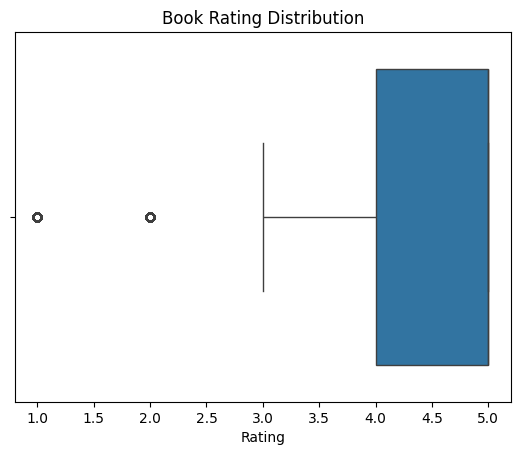

In [14]:
sns.boxplot(x=cf_books['review/score'])
plt.title('Book Rating Distribution')
plt.xlabel('Rating')
plt.show()

Based on value counts, a rating of 5 appears most frequently, while rating of 2 is the least common. In the boxplot, distribution of ```review/score``` is positively skewed (right-skewed). However, since the data will be used to generate recommendations that prioritize higher ratings, removing outlier may not be necessary.

## **DATA PREPROCESSING**

Eleminate entries with duplicated values that were identified earlier.

In [15]:
cf_books = cf_books.drop_duplicates()

Order the dataset alpahabetically by the ```Title``` columns.

In [16]:
cf_books_sort = cf_books.sort_values(by='Title')
cf_books_sort

,Id,Title,User_id,review/score
1822,B000H3DK02,"""A"" IS FOR ALIBI",A21ADOKXYYAGM5,5.0
12895,B0006EI6OW,"""C"" is for Corpse (A Kinsey Millhone mystery, ...",A1OFV8WMWSGZD9,2.0
3092,B000FBLF8U,"""D"" is for Deadbeat",A17EUAH250GNVP,5.0
9595,0791426793,"""Good Writing"" in Cross-Cultural Context (Suny...",A2NBHQI195MSLT,4.0
12128,0471293393,"""Hey, Whipple, Squeeze This"": A Guide to Creat...",A11GTCHP97YTQI,3.0
...,...,...,...,...
18622,B000GM8FUO,the story of ferdinand,A2OVIQICPP6KUX,5.0
5552,B000IV7BX0,the wind and the rain,A7X70BV98GL2H,5.0
104,B000GRKLEW,three without fear,A3H3JWNFH4LCFX,4.0
19811,B000LEHPUS,ttyl,A2PDETW3JDUOY,3.0


Display the distinct values from the ```Title``` columns.

In [17]:
cf_books_sort.Title.unique()

array(['"A" IS FOR ALIBI',
       '"C" is for Corpse (A Kinsey Millhone mystery, Book 3)',
       '"D" is for Deadbeat', ..., 'three without fear', 'ttyl',
       'using what you got'], dtype=object)

## **MODEL DEVELOPMENT**

### **CONTENT BASED FILTERING**

Apply a TF-IDF vectorizer to extract important feature representations from each book title, then fitting and transforming the text into a numerical matrices.

In [18]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrices = tfidf.fit_transform(cf_books_sort['Title'])

tfidf.get_feature_names_out()

array(['00', '000', '001', ..., 'zukunft', 'zuni', 'zur'], dtype=object)

In [19]:
tfidf_matrices.shape

(20381, 14039)

The resulting matrices has a shape of (20381, 14039), with each row representing a book title and each column corresponding to a unique term extratced from the titles.

Since the output of TF-IDF vectorizer is a sparse matrices, we convert it into a dense format using ```.dense()```.

In [20]:
tfidf_matrices.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Display TF-IDF matrices for the first 10 rows of the ```Title``` column. Words that appear in these titles are assigned as a non-zero weights by TF-IDF vectorizer, reflecting their relative importance within the corpus.  

In [21]:
pd.DataFrame(
    tfidf_matrices.todense(),
    columns=tfidf.get_feature_names_out(),
    index=cf_books_sort['Title'],
).sample(22, axis=1).sample(10, axis=0)

,harmony,preparation,cassettes,ivy,profession,giants,corean,depp,geomorphology,jacob,...,tuff,hens,issola,ct304,boynton,pounds,casey,finish,regained,apo
Title,,,,,,,,,,,,,,,,,,,,,
Strange TV: Innovative Television Series from The Twilight Zone to The X-Files,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alice's Adventures in Wonderland / Through the Looking-Glass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Information Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Hobbit There and Back Again,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Martian Way,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
When Calls the Heart (Secrets of Heathersleigh Hall),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Clifford, el gran perro colorado",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Wizard of Earthsea (Earthsea Trilogy Ser.),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Middlemarch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculate similarity degree between each title using Cosine Similarity technique.

In [22]:
cosine_sim = cosine_similarity(tfidf_matrices)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Display a subset of the similarity matrices for each title using 5 sample columns (axis=1) and 100 sample rows (axis=0).

In [30]:
cosine_sim_books = pd.DataFrame(
    cosine_sim,
    index=cf_books_sort['Title'],
    columns=cf_books_sort['Title'],
)

print('Shape:', cosine_sim_books.shape)
cosine_sim_books.sample(5, axis=1).sample(100, axis=0)

Shape: (20381, 20381)


Title,How to Think About Statistics: Sixth Edition (Series of Books in Psychology),"Mathematical Methods for Physicists Solutions Manual, 5th edition, Fifth Edition",Voyage from yesteryear,Rime of the Ancient Mariner,Beginning Linux Programming (Linux Programming Series)
Title,,,,,
The Green Banana Papers : Marketing Secrets for Technology Entrepreneurs,0.000000,0.0,0.0,0.0,0.0
Social Gerontology With Research Navigator: A Multidisciplinary Perspective,0.000000,0.0,0.0,0.0,0.0
Nothing in Common,0.000000,0.0,0.0,0.0,0.0
"Crossroads of Twilight (The Wheel of Time, Book 10)",0.000000,0.0,0.0,0.0,0.0
God calling,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...
"Two years before the mast: A personal narrative of life at sea,",0.000000,0.0,0.0,0.0,0.0
Colour Of Magic,0.000000,0.0,0.0,0.0,0.0
The adventures of Huckleberry Finn,0.000000,0.0,0.0,0.0,0.0


Based on this result, the cosine similarity matrices has a shape (20381, 20381), where both x-axis and y-axis represent book titles. This allow us to identify similarity between titles. For example, ```Elmer Gantry (Avon Books #1)``` shows similary to ```How to Think About Statistics: Sixth Edition (Series of Books in Psychology)``` with similary score up to 0.097667.

### **COLLABORATIVE FILTERING**

Convert ```User_id``` and ```Id``` into encoded integer representations.

In [31]:
user_ids = cf_books_sort['User_id'].unique().tolist()
print('List UserID:', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('Encoded UserID:', user_to_user_encoded)

user_encode_to_user = {i: x for i, x in enumerate(user_ids)}
print('Encode Number of UserID:', user_encode_to_user)

List UserID: ['A21ADOKXYYAGM5', 'A1OFV8WMWSGZD9', 'A17EUAH250GNVP', 'A2NBHQI195MSLT', 'A11GTCHP97YTQI', 'A1APW5TK8QSA68', 'A3A597R6N8RXZS', 'A2LNK434OR0WL2', 'A3G0WI63Z3ED6B', 'A2LZ4IWESHKL5B', 'A2ZMYOWMAJ70SL', 'A1G599E9PZM5BO', 'A20WQ9BVFQSMDP', 'A24UCKDIE6SABF', 'A1XTAPWR6TMD8K', 'A3BOC430DZF8BT', 'A12GSZZW2DGMQ3', 'A26M05IS8N499J', 'A3NM58IBMPUSZ2', 'A1ZV178M5X30ES', 'APIO2NHXK2PEJ', 'A1S9L08ZZZ0K3F', 'A3V0FHAF0M2MNJ', 'AIO8AWIIGFJW0', 'A2Y51HKWATKI9I', 'AMESA9ZTX2C7V', 'A5F466128I3I4', 'A3C2WB7RGSFNYG', 'A260NUR5PNVR2I', 'A3DVIFE0EUGUEE', 'AAS6FN0D77B6A', 'A22LWL47398SBT', 'A3LVCG1U048UI7', 'A2Y4ZJS1IBQ1OO', 'A2PHR0ZNC07OBK', 'A3I1L92N000D2Q', 'A30SJWSS8QW3QI', 'ANF06P3X012Q0', 'A289I19NUVLIDC', 'A2W9V4PVK8LBSG', 'A3PNAAK2R7IKHX', 'A373ZDSBXPJPCC', 'A2BJZQUZ70G4I3', 'A3401BR7KTJQW0', 'A228MEH9BYAYPE', 'A1RP5LM92M8VAE', 'A2NZ2CARU50ODO', 'A2DLDGEIWV7QIY', 'A11N6QIF98MYTE', 'A2E0E07A40KMV1', 'A27EVWDXBC7OG4', 'A3HIW5XH3N9W0Z', 'A2JW3OTUMIGPLJ', 'A3PWF2AQ5XYALW', 'A29AN669PSUZBM', 'A

In [36]:
ids = cf_books_sort['Id'].unique().tolist()
print('List Id:', ids)

id_to_id_encode = {x: i for i, x in enumerate(ids)}
print('Encoded Id:', id_to_id_encode)

id_encode_to_id = {i: x for i, x in enumerate(ids)}
print('Encode Number to Id:', id_encode_to_id)

List Id: ['B000H3DK02', 'B0006EI6OW', 'B000FBLF8U', '0791426793', '0471293393', 'B0007FEYRS', '1841769231', '0877880239', '0688156347', 'B00085KLN8', 'B000P7JRY8', 'B000OLP7B2', '0825618010', '0374521387', '0670543942', '1581346581', '0672323338', '0761104844', '0965088189', '1569244359', '1561709905', '1555838987', 'B000K71L0G', 'B000PS5LX8', '1565121384', '1890947199', '0763748390', '0955141338', '0800786130', '0968618200', '3822876291', '0789313715', '140543709X', '0801063949', 'B000GR0EZI', '0912411422', '0912411198', 'B0002KM4V6', 'B000IUC6VS', '0793588596', '1573671681', '0539812900', '1555838669', '1585182583', '0517073064', 'B000MU84HE', 'B0007EXFG0', '0812004051', '1932586393', '0778800547', '0778801233', 'B000OVP1AY', '0060541415', '1565119770', '140004006X', '1565073711', '0881883077', '0778322599', '0671319728', '0743488156', '0812972961', '075990345X', '0072260858', '1596073861', '0743203941', 'B000H20KEC', 'B0007E8TUW', 'B0006RX4GY', 'B000HVR6KY', '9562910334', 'B00009ANY

Associate ```User_id``` and ```Id``` columns with the corresponding DataFrame.

In [37]:
cf_books_sort['user_id'] = cf_books_sort['User_id'].map(user_to_user_encoded)
cf_books_sort['title_id'] = cf_books_sort['Id'].map(id_to_id_encode)

Retrieve the count of unique UserID and TitleID, as well as minimum and maximum rating values.

In [38]:
num_user_id = len(user_to_user_encoded)
print(f'UserID: {num_user_id}')

num_title_id = len(id_to_id_encode)
print(f'TitleID: {num_title_id}')

min_rating = min(cf_books_sort['review/score'])
print(f'Min: {min_rating}')

max_rating = max(cf_books_sort['review/score'])
print(f'Max: {max_rating}')

UserID: 18625
TitleID: 13143
Min: 1.0
Max: 5.0


Before splitting, shuffle dataset to ensure random distribution accros the training and validation sets.

In [39]:
cf_books_sort = cf_books_sort.sample(frac=1, random_state=42)
cf_books_sort

,Id,Title,User_id,review/score,user_id,title_id
10946,B000K6JE0Q,Losing Your Pounds of Pain,AXI6BOK7P2LYS,1.0,8084,5624
11528,B000J521DU,"ERAGON: INHERITANCE, BOOK ONE.",A3M61ZBS13XPBZ,5.0,4189,2872
7262,0613103572,Angela's Ashes (Turtleback School & Library Bi...,A3SFETHRODPP8W,5.0,1418,916
5172,B00017JJ5O,"Soul Harvest: Left Behind, Volume 4",A38FL8ORJLE8N,2.0,11843,8409
4005,B000J2S05Q,The Day Of The Triffids,A26IBPSQ1DII7S,4.0,13454,9586
...,...,...,...,...,...,...
18776,B0000CN8VO,Progeny of the Adder,A1FCWRSICTO2AH,4.0,10588,7363
14477,0967061202,San Diego Activity And Coloring Book For All Ages,A2SKIXO7T6URY8,5.0,11214,7887
3816,0743528751,"French III, Comprehensive: Learn to Speak and ...",A3BZC948CT1YQY,4.0,5170,3587
1682,B00086DU9E,A rebel's recollections,ALMPYGQGH9VTY,2.0,843,522


Define ```x``` for features and ```y``` as a target variable, then split the data into 80% training and 20% for validation. After that, normalize ratings to a 0-1 range to facilitate model convergence.

In [40]:
x = cf_books_sort[['user_id', 'title_id']].values
y = cf_books_sort['review/score'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * cf_books_sort.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x, y)

[[ 8084  5624]
 [ 4189  2872]
 [ 1418   916]
 ...
 [ 5170  3587]
 [  843   522]
 [14655 10311]] [0.   1.   1.   ... 0.75 0.25 1.  ]


Define a ```RecommenderNet``` class that embeds both of ```UserID``` and ```TitleID``` columns, computes their with dot product, and incorporates individual bias terms. The similarity score is passed through a sigmoid activation function to normalize values between 0 and 1.   

In [41]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_user_id, num_title_id, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_user_id = num_user_id
        self.num_title_id = num_title_id
        self.embedding_size = embedding_size

        self.user_id_embedding = layers.Embedding(
            num_user_id,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_id_bias = layers.Embedding(
            num_user_id,
            1,
        )

        self.title_id_embedding = layers.Embedding(
            num_title_id,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.title_id_bias = layers.Embedding(num_title_id, 1)

    def call(self, inputs):
        user_id_vector = self.user_id_embedding(inputs[:, 0])
        user_id_bias = self.user_id_bias(inputs[:, 0])

        title_id_vector = self.title_id_embedding(inputs[:, 1])
        title_id_bias = self.title_id_bias(inputs[:, 1])

        dot_user_id_and_title_id = tf.tensordot(user_id_vector, title_id_vector, 2)

        x = dot_user_id_and_title_id + user_id_bias + title_id_bias

        return tf.nn.sigmoid(x)

Initialize compilation of the model by defining ```binary cross-entropy``` loss, ```Adam``` optimizer, and ```RMSE``` as the evaluation metric.

In [42]:
model = RecommenderNet(num_user_id, num_title_id, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Define a callback and initiate the model training process.

In [43]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callback]
)

Epoch 1/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.6915 - root_mean_squared_error: 0.4239 - val_loss: 0.6840 - val_root_mean_squared_error: 0.4238
Epoch 2/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6397 - root_mean_squared_error: 0.3936 - val_loss: 0.6759 - val_root_mean_squared_error: 0.4183
Epoch 3/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.5154 - root_mean_squared_error: 0.3130 - val_loss: 0.6726 - val_root_mean_squared_error: 0.4157
Epoch 4/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4939 - root_mean_squared_error: 0.2950 - val_loss: 0.6705 - val_root_mean_squared_error: 0.4142
Epoch 5/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4755 - root_mean_squared_error: 0.2834 - val_loss: 0.6678 - val_root_mean_squared_error: 0.4125
Epoch 6/100
2038/2038 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4620 - root_mean_squared_error: 0.2763 - val_loss: 0.6653 - val_root_mean_squared_error: 0.4110
Epoch 7/100
2038/2038 ━━━━━━━━━━

## **EVALUATION**

### **CONTENT BASED FILTERING**

A query book is selected as the input for recommendation function. A set of manually curated relevant titles is defined to benchmark recommendation quality, then retrieve the 5 most similar titles based on the query.

In [34]:
query_book = 'Buddha Mom: The Journey Through Mindful Mothering'

relevant_books = [
    'My Mom Is a Dragon',
    'The Buddha in the robot',
    'The Buddha of Suburbia',
]

recommended_df = books_recommendations(query_book, k=5)
recommended_books = recommended_df['Title'].tolist()

Evaluation metrics such as ```Precision@k```, ```Recall@k```, ```F1@k```, and ```MRR``` are essential for measuring effectiveness of recommender system in terms of both relevance and ranking performance.

In [35]:
def precision_at_k(recommended, relevant, k=5):
    recommended_k = recommended[:k]
    hits = sum([1 for book in recommended_k if book in relevant])
    return hits / k

precision = precision_at_k(recommended_books, relevant_books, k=5)
print('Precision@5:', precision)

def recall_at_k(recommended, relevant, k=5):
    recommended_k = recommended[:k]
    hits = sum(1 for book in recommended_k if book in relevant)
    return hits/len(relevant) if len(relevant) > 0 else 0

recall = recall_at_k(recommended_books, relevant_books, k=5)
print(f'Recall@5:', recall)

def f1_at_k(recommended, relevant, k=5):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

f1 = f1_at_k(precision, recall)
print(f'F1@5:', f1)

def reciprocal_rank(recommended, relevant):
    for i, book in enumerate(recommended):
        if book in relevant:
            return 1 / (i + 1)
    return 0

mrr = reciprocal_rank(recommended_books, relevant_books)
print('MRR:', mrr)

Precision@5: 0.6
Recall@5: 1.0
F1@5: 0.7499999999999999
MRR: 1.0


These result suggest that recommendation system is highly effective, especially in recalling all relevant items and ranking them prominetly. Despite a slightly imperfect precision, this system still provides strong overall performance.   

### **COLLABORATIVE FILTERING**

Following the training phase, model's learning performance is visualized through a line plot of Root Mean Square Error (RMSE) across epochs, comparing both training dan validation data.

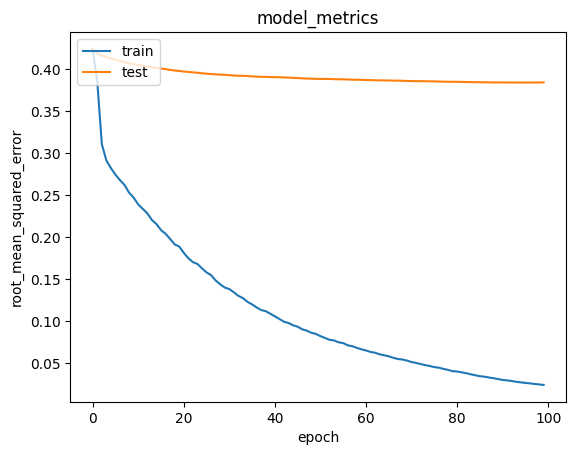

In [44]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This graph indicates that model performs increasingly well on training data, while its performance on validation data remains relatively constant. This suggest a risk of overfitting, as model fails to generalize to unseen data.  

## **RESULT**

### **CONTENT BASED FILTERING**

Define a function to returns top *k* book titles most similar to a given input title based on Cosine Similarity and enables content-based book recommendations by analyzing textual similarity among books titles. It excludes original input title from results and merges recommended titles with their associated metadata.

In [32]:
def books_recommendations(Title, similarity_data=cosine_sim_books, items=cf_books_sort[['Title', 'Id']], k=5):
    index = similarity_data.loc[:, Title].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(Title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

This function returns the top 5 books that are most similar to "*Buddha Mom: The Journey Through Mindful Mothering*" in terms of their TF-IDF feature representation using Cosine Similarity.

In [33]:
books_recommendations('Buddha Mom: The Journey Through Mindful Mothering')

,Title,Id
0,My Mom Is a Dragon,0971594058
1,The Buddha in the robot,B0006EAV8Q
2,The Buddha of Suburbia,014013168X
3,In the Buddha's Words: An Anthology of Discour...,0861714911
4,Such a Long Journey,0864922191


### **COLLABORATIVE FILTERING**

Selects a random user from dataset and retrieves all the books they have rated. By filtering dataset based on the selected UserID, we can examine the titles and corresponding scores provided by user.    

In [45]:
df_rating = cf_books_sort.copy()
random_user_id = df_rating['User_id'].sample(1).iloc[0]
books_rated_by_user = df_rating[df_rating['User_id'] == random_user_id]

print(f"User {random_user_id} Has Rated the Following Books:")
print(books_rated_by_user[['Title', 'review/score']])

User A1ICSOSXOBZENW Has Rated the Following Books:
                  Title  review/score
18215  Spirit of Family           5.0


This system identifies all books that user hasn't rated and predicts the user potential interest in each on using a trained recommender model. Based on predicted scores, system ranks and selects top 10 books likely to match user's preferences. These recommendation are then displayed along with their title and existing average scores.

In [46]:
all_book_ids = set(id_to_id_encode.keys())
rated_book_ids = set(books_rated_by_user['Id'].values)
unrated_book_ids = list(all_book_ids - rated_book_ids)
unrated_book_encoded = [id_to_id_encode[b] for b in unrated_book_ids]
user_encoded = user_to_user_encoded[random_user_id]

user_input = np.array([[user_encoded]] * len(unrated_book_encoded))
book_input = np.array(unrated_book_encoded).reshape(-1, 1)
model_input = np.hstack([user_input, book_input])

predicted_scores = model.predict(model_input).flatten()

top_indices = predicted_scores.argsort()[-10:][::-1]
top_book_encoded = [unrated_book_encoded[i] for i in top_indices]
top_book_ids = [id_encode_to_id[enc] for enc in top_book_encoded]

recommended_books = df_rating[df_rating['Id'].isin(top_book_ids)][['Title', 'review/score']].drop_duplicates()
print("\nTop Book Recommendation For {}:".format(random_user_id))
print(recommended_books.reset_index(drop=True))

411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Top Book Recommendation For A1ICSOSXOBZENW:
                                                Title  review/score
0   A CHRISTMAS CAROL, BEING A GHOST STORY OF CHRI...           5.0
1                          The richest man in Babylon           5.0
2   Taking Charge of Your Fertility: The Definitiv...           5.0
3   Seabiscuit: An American Legend (Trade Edition)...           5.0
4                                      Redeeming Love           5.0
5   THE BOOK OF MORMON: Another Testament of Jesus...           5.0
6   The China Study: The Most Comprehensive Study ...           5.0
7                 The Count Of Monte Cristo, Abridged           5.0
8          With the Old Breed: At Peleliu and Okinawa           5.0
9        Wizard's First Rule (Sword of Truth, Book 1)           5.0
10  Seabiscuit: An American Legend (Trade Edition)...           2.0
11       Wizard's First Rule (Sword of Truth, Book 1)           4.0
12         With the Old Breed:

Based on the result, the system recommend user's by book title such as "A Christmas Carol" and "The Richest Man in Babylon", each with high predicted interest. Despite variations in actual dataset ratings, these books were ranked highly by model due to their relevance to user's profile and reading history.